In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from splinter import Browser
from bs4 import BeautifulSoup as BeautifulSoup
from webdriver_manager.chrome import ChromeDriverManager
import datetime as datetime
import pandas as pd


In [2]:
executable_path = {"executable_path": ChromeDriverManager().install()}
browser = Browser("chrome", **executable_path, headless=False)

In [3]:
url = "https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html"
browser.visit(url)
html = browser.html
soup = BeautifulSoup(html, "html.parser")

In [4]:
html_table = soup.find("table", class_="table")

In [5]:
html_table_header = html_table.find_all("th")

html_headers=[]
for header_element in html_table_header:
    title=header_element.text
    html_headers.append(title)
    
html_headers

['id', 'terrestrial_date', 'sol', 'ls', 'month', 'min_temp', 'pressure']

In [6]:
mars_scraped_df=pd.read_html(url)
mars_scraped_df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [7]:
mars_temps=mars_scraped_df[0]
mars_temps

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [8]:
mars_temps.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [9]:
mars_temps['terrestrial_date']=pd.to_datetime(mars_temps['terrestrial_date'])
mars_temps.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [10]:
mars_temps

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [26]:
mars_temps['min_temp']=mars_temps['min_temp'].astype(int)

In [27]:
mars_temps['pressure']=mars_temps['pressure'].astype(int)

In [28]:
mars_temps.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                     int32
pressure                     int32
dtype: object

In [29]:
mars_temps

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75,739
1,13,2012-08-17,11,156,6,-76,740
2,24,2012-08-18,12,156,6,-76,741
3,35,2012-08-19,13,157,6,-74,732
4,46,2012-08-20,14,157,6,-74,740
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78,730
1863,1892,2018-02-24,1974,134,5,-77,729
1864,1894,2018-02-25,1975,134,5,-76,729
1865,1893,2018-02-26,1976,135,5,-77,728


In [30]:
number_of_months=mars_scraped_df[0]

In [20]:
number_of_months.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [31]:
#number of months in Mars
number_of_months['month'].nunique()

12

In [35]:
martian_days=mars_scraped_df[0]

In [36]:
#how many Martian Days worth of data exist inthe scraped dataset?
martian_days['sol'].nunique()

1867

Text(0, 0.5, 'Avg Temps')

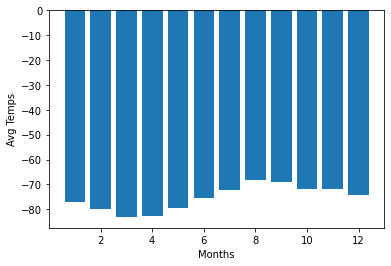

In [42]:
month=mars_temps.groupby('month')
min_month=month['min_temp'].mean() 
x_axis=[1,2,3,4,5,6,7,8,9,10,11,12]
y_axis=min_month
plt.bar(x_axis, y_axis)
plt.xlabel('Months') 
plt.ylabel('Avg Temps') 

Text(0, 0.5, 'Avg Pressure')

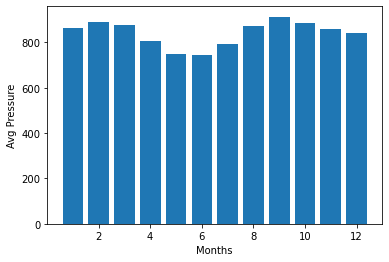

In [43]:
min_pressure=month['pressure'].mean() 
x_axis=[1,2,3,4,5,6,7,8,9,10,11,12]
y_axis=min_pressure
plt.bar(x_axis, y_axis)
plt.xlabel('Months') 
plt.ylabel('Avg Pressure')  

In [45]:
mars_scraped_df.to_csv("Mars_data_pt2")

AttributeError: 'list' object has no attribute 'to_csv'

In [48]:
print(mars_scraped_df)

[        id terrestrial_date   sol   ls  month  min_temp  pressure
0        2       2012-08-16    10  155      6       -75       739
1       13       2012-08-17    11  156      6       -76       740
2       24       2012-08-18    12  156      6       -76       741
3       35       2012-08-19    13  157      6       -74       732
4       46       2012-08-20    14  157      6       -74       740
...    ...              ...   ...  ...    ...       ...       ...
1862  1889       2018-02-23  1973  133      5       -78       730
1863  1892       2018-02-24  1974  134      5       -77       729
1864  1894       2018-02-25  1975  134      5       -76       729
1865  1893       2018-02-26  1976  135      5       -77       728
1866  1895       2018-02-27  1977  135      5       -77       727

[1867 rows x 7 columns]]
